# SVM Assignment

- Support Vector Machine Classifier
- Support Vector Machine with Kernels Classifier

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Linear kernel 

### Data set

In [59]:
# run the following commands
# use generated (X, y) as the data set
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. 
For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can (may not perfectly) discriminate between the two classes!

We can draw them as follows:

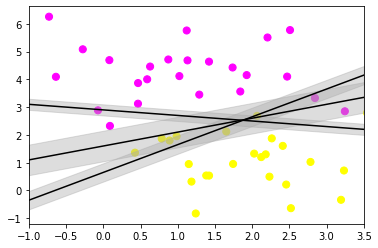

In [60]:
# run the following commands to plot
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Fitting a support vector machine

In [61]:
# here is an example of SVC
# run this cell
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [62]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.reshape([xi, yj], (1, -1)))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

For an SVC called `clf`, command `clf.support_vectors_` will return all its support vectors.

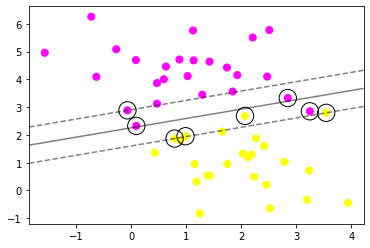

In [63]:
# here is the complete visialization of the 'example' SVC 'clf'
# run this cell
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', linewidths=1);

### Your task:

For linear kernal:

1. use **5-fold** cross validation to perform grid search to calculate optimal hyper-parameters
2. the values of possible $C$ are in list: [$2^i$ for $i$ in range(10)]
3. find the **best params** & corresponding **best estimator** & the total number of support vectors of the best estimator
4. plot the complete visialization of the best estimator (similar graph as the previous example)

Note: use `one-vs-rest` decision function!

In [64]:
# import GridSerarchCV & classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [65]:
# Set the parameters for cross-validation
# Your code here
# One-line code 
# Hint: 'C': [2**i for i in range(10)]
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [2**𝑖 for 𝑖 in range(10)]},
              {'kernel': ['linear'], 'gamma':['auto'],'C': [2**𝑖 for 𝑖 in range(10)]}]

In [66]:
# run gridsearch-cross_validation then fit the data
# Your code here
# Two-line codes
# hint: use GridSearchCV()
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(X, y)

print("Best parameters set found on development set:")
print()
print(clf.best_params_) # Your code here -- print best parameters)
print()
print("Best estimator found on development set:")
print()
print(clf.best_estimator_) # Your code here -- print best estimator)
print()
print("Number of the support vectors of the best estimator:")
print()
print(len(clf.best_estimator_.support_vectors_)) # Your code here -- print the number of support vectors)
print()

Best parameters set found on development set:

{'C': 4, 'gamma': 0.001, 'kernel': 'rbf'}

Best estimator found on development set:

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Number of the support vectors of the best estimator:

40



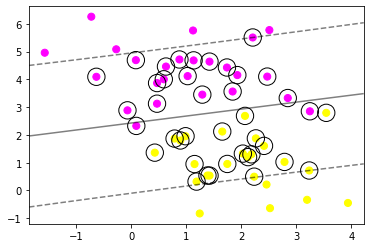

In [67]:
# plot the original data + decision boundary + support vectors
# Your code here
# Three-line codes
# Hint: see previous example
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', linewidths=1);

# KNN Assignment

Follow the analysis procedure above, **Change data set to iris, use the latter two features instead of the first two**. Use `GridSearchCV` with `[5,10,15]`-folds and `n_neighbors = list(range(1, 50, 2))` to find the best (fold, neighbor) combination, which gives the highest `mean_test_score`.

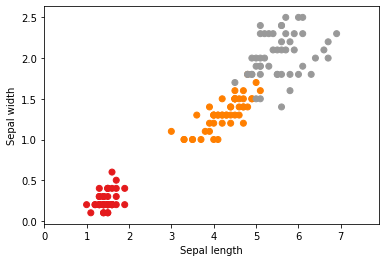

In [71]:
# Create the KNN
from sklearn import neighbors,datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, -2:] # we only take the last two features.
y = iris.target

# plot X into 2-D graph
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max);

In [106]:
#folds = range(5,15,5)

#means = {'fold':[],'neighbor':[],'mean_test_score':[]}


new = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                   param_grid={'n_neighbors': list(range(1, 50, 2))},
                   cv = 5,
                   return_train_score=True)
new.fit(X, y)
print('when cv=5, mean test score',new.cv_results_['mean_test_score'])

when cv=5, mean test score [0.97333333 0.95333333 0.96666667 0.96       0.96666667 0.96666667
 0.96       0.96666667 0.96666667 0.96       0.96666667 0.96666667
 0.94666667 0.96       0.96       0.95333333 0.95333333 0.95333333
 0.95333333 0.95333333 0.96       0.96       0.96       0.96
 0.96      ]


In [110]:
new2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                   param_grid={'n_neighbors': list(range(1, 50, 2))},
                   cv = 10,
                   return_train_score=True)
new2.fit(X, y)
print('when cv=10, mean test score',new2.cv_results_['mean_test_score'])



when cv=10, mean test score [0.97333333 0.96       0.96666667 0.96       0.96       0.96666667
 0.96       0.96       0.96       0.96666667 0.96666667 0.96666667
 0.96       0.96       0.94666667 0.95333333 0.96       0.95333333
 0.95333333 0.95333333 0.95333333 0.95333333 0.95333333 0.96
 0.96      ]


In [109]:
new3 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                   param_grid={'n_neighbors': list(range(1, 50, 2))},
                   cv = 15,
                   return_train_score=True)
new3.fit(X, y)
print('when cv=15, mean test score',new3.cv_results_['mean_test_score'])


when cv=15, mean test score [0.97333333 0.96       0.96666667 0.96       0.96       0.96666667
 0.96       0.96       0.96666667 0.96666667 0.96666667 0.96
 0.96       0.96       0.95333333 0.95333333 0.95333333 0.94666667
 0.94666667 0.95333333 0.95333333 0.95333333 0.95333333 0.96
 0.95333333]


In [112]:
print('as 0.97333333 is the highest mean test score, the best (fold, neighbor) combinations are (5,1),(10,1),(15,1)')

as 0.97333333 is the highest mean test score, the best (fold, neighbor) combinations are (5,1),(10,1),(15,1)
